<img src="https://www.mmu.edu.my/fci/wp-content/uploads/2021/01/FCI_wNEW_MMU_LOGO.png" style="height: 80px;" align=left>  

## Submission Exercise
Perform preliminary investigation on the given Test set of the Big Mart Sales dataset. Complete each of the task using python code, and text discussion when necessary. Submit the completed notebook by 21/11/2023 (Tuesday), 11.59pm for your Week 3 Tutorial attendance.



---



### For Google Colab Use Only
Skip this section if you are using Jupyter Notebook etc.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [ ]:
drive_path = '/content/drive/MyDrive/Trimester/2310/TDS3301/Tutorials/Tutorial 2/' #set your google drive path

---

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

# Read data

Investigate the given Big Mart Sales, Test set.

In [ ]:
try:
  drive_path
except NameError:
  drive_path = ''

df = pd.read_csv(drive_path + "BigMartSales/test.csv")

### Task 1

What are the differences in features and number of samples between this Test set with the Train set? <br>
Use python code to check and show the rows and columns, then state the differences.

In [1]:
# Enter your code here
# find difference between test & train set
import pandas as pd

# Assuming you have two datasets: train_set.csv and test_set.csv
train_set = pd.read_csv("BigMartSales/train.csv")
test_set = pd.read_csv("BigMartSales/test.csv")

# Display the number of rows and columns for the train set
print("Train Set:")
print("Number of rows:", train_set.shape[0])
print("Number of columns:", train_set.shape[1])

# Display the number of rows and columns for the test set
print("\nTest Set:")
print("Number of rows:", test_set.shape[0])
print("Number of columns:", test_set.shape[1])

# Compare features
train_features = set(train_set.columns)
test_features = set(test_set.columns)

common_features = train_features.intersection(test_features)
unique_train_features = train_features - common_features
unique_test_features = test_features - common_features

print("\nFeatures in common:", common_features)
print("Unique features in the train set:", unique_train_features)
print("Unique features in the test set:", unique_test_features)

Train Set:
Number of rows: 8523
Number of columns: 12

Test Set:
Number of rows: 5681
Number of columns: 11

Features in common: {'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Weight', 'Item_Fat_Content', 'Item_MRP', 'Item_Identifier', 'Item_Type', 'Item_Visibility', 'Outlet_Establishment_Year'}
Unique features in the train set: {'Item_Outlet_Sales'}
Unique features in the test set: set()


### Task 2

Check and verify the data attribute types of the Test set. If necessary, convert them into the proper data type.


In [2]:
# Enter your code here

# Display the data types of each attribute in the test set
print("Data types in the Test Set:")
print(test_set.dtypes)

# Check for any missing values in the test set
print("\nMissing values in the Test Set:")
print(test_set.isnull().sum())

# Note (I dont know when or where to change, so I put this as a future reference)
# If 'column_name' needs to be converted to integer
# test_set['column_name'] = test_set['column_name'].astype(int)

# If 'date_column' needs to be converted to datetime
# test_set['date_column'] = pd.to_datetime(test_set['date_column'])

# To check the data types again to verify
print("\nUpdated Data types in the Test Set:")
print(test_set.dtypes)


Data types in the Test Set:
Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

Missing values in the Test Set:
Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Updated Data types in the Test Set:
Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content    

### Task 3
Check for missing data and perform cleaning on the Test set.
You can either remove the data with missing values, or fill in the missing data with some value. Justify your choices and implement in the code.

In [3]:
# Enter your code here

# Display the number of missing values in each column
print("Missing values in the Test Set:")
print(test_set.isnull().sum())

# Remove rows with missing values
test_set_cleaned = test_set.dropna()

# Display the number of missing values in the cleaned test set
print("\nMissing values in the Cleaned Test Set:")
print(test_set_cleaned.isnull().sum())


Missing values in the Test Set:
Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Missing values in the Cleaned Test Set:
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64


### Task 4
Check the measures of central tendency of the numerical attributes (except `Outlet_Establishment_Year`) of the Test set, before the cleaning, and after the cleaning. Are they similar or significantly different?
Show the measures (mean, median, etc.) and discuss.

In [4]:
# Enter your code here

# Display measures of central tendency before cleaning
print("Measures of Central Tendency Before Cleaning:")
print(test_set.describe())

# Remove rows with missing values
test_set_cleaned = test_set.dropna()

# Display measures of central tendency after cleaning
print("\nMeasures of Central Tendency After Cleaning:")
print(test_set_cleaned.describe())


Measures of Central Tendency Before Cleaning:
       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year
count  4705.000000      5681.000000  5681.000000                5681.000000
mean     12.695633         0.065684   141.023273                1997.828903
std       4.664849         0.051252    61.809091                   8.372256
min       4.555000         0.000000    31.990000                1985.000000
25%       8.645000         0.027047    94.412000                1987.000000
50%      12.500000         0.054154   141.415400                1999.000000
75%      16.700000         0.093463   186.026600                2004.000000
max      21.350000         0.323637   266.588400                2009.000000

Measures of Central Tendency After Cleaning:
       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year
count  3099.000000      3099.000000  3099.000000                3099.000000
mean     12.658206         0.059063   140.036189                1999.189

### Task 5

Plot the histrograms and density plot for the numerical attributes (except `Outlet_Establishment_Year`) of the Test set before and after cleaning. Do you observe any differences? Discuss.

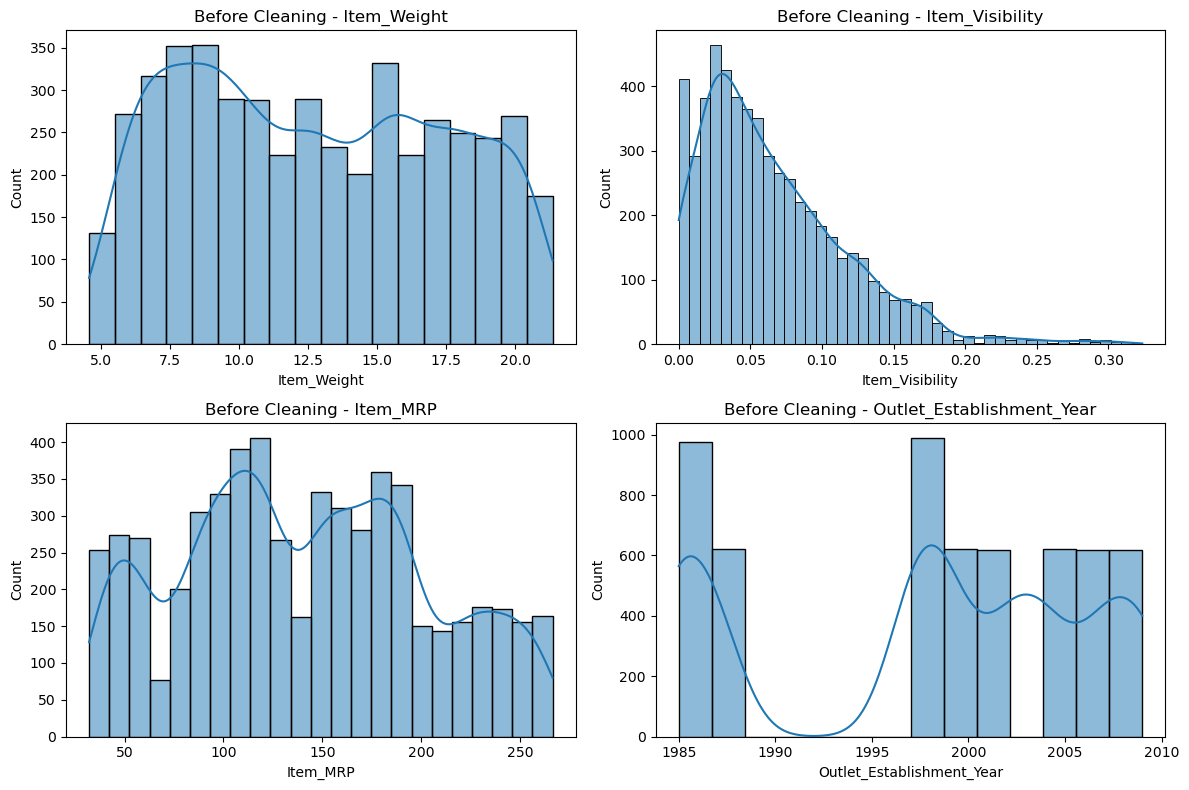

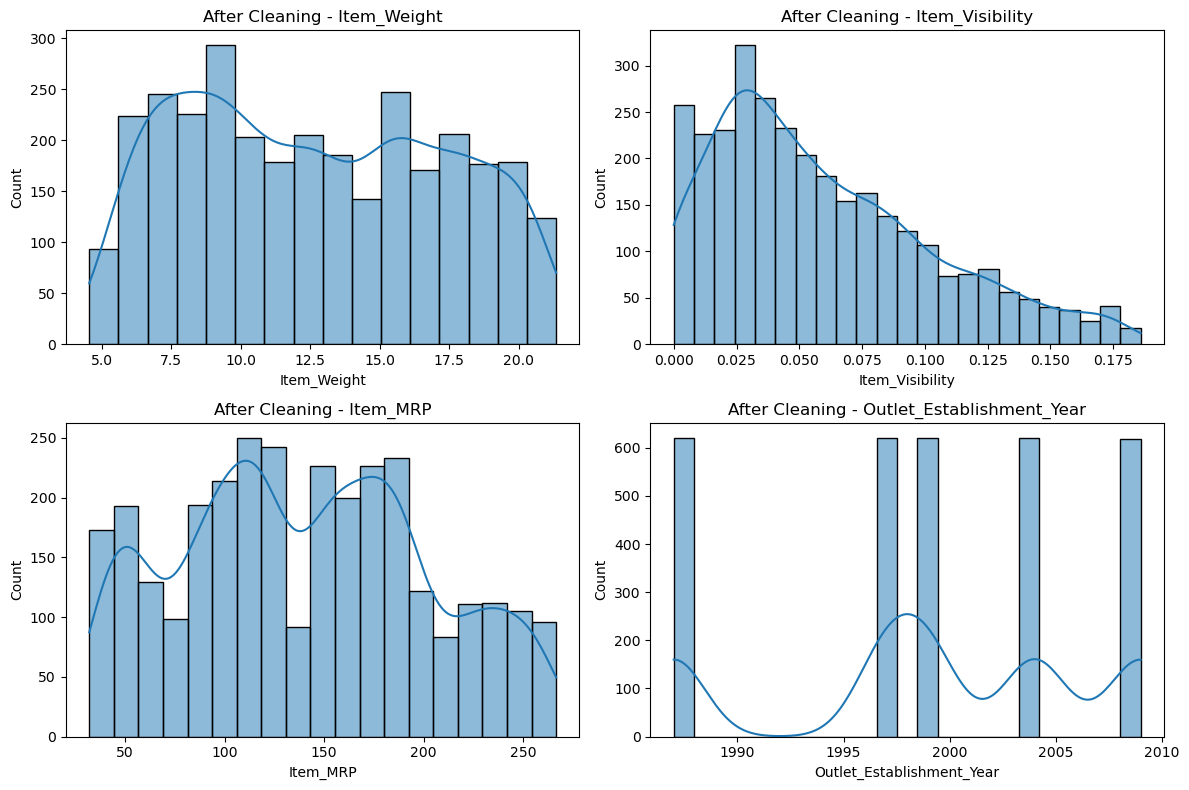

In [5]:
# Enter your code here

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical attributes to plot
numerical_attributes = test_set.select_dtypes(include=['float64', 'int64']).columns #numerical attributes
# cat_att = test_set.select_dtypes(include=['object']).columns #categorical att

# Plot histograms and density plots before cleaning
plt.figure(figsize=(12, 8))
for attribute in numerical_attributes:
    plt.subplot(2, len(numerical_attributes)//2, list(numerical_attributes).index(attribute)+1)
    sns.histplot(test_set[attribute], kde=True)
    plt.title(f'Before Cleaning - {attribute}')
    plt.xlabel(attribute)

plt.tight_layout()
plt.show()

# Remove rows with missing values
test_set_cleaned = test_set.dropna()

# Plot histograms and density plots after cleaning 
plt.figure(figsize=(12, 8))
for attribute in numerical_attributes:
    plt.subplot(2, len(numerical_attributes)//2, list(numerical_attributes).index(attribute)+1)
    sns.histplot(test_set_cleaned[attribute], kde=True)
    plt.title(f'After Cleaning - {attribute}')
    plt.xlabel(attribute)

plt.tight_layout()
plt.show()


### Task 6

Check the skewness of the numerical attributes (except `Outlet_Establishment_Year`) of the cleaned Test set. Discuss their skewness (positive, negative, etc.)

In [6]:
# Enter your code here

# List of numerical attributes to check skewness
numerical_attributes = test_set_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Display skewness for each numerical attribute
print("Skewness of Numerical Attributes in the Cleaned Test Set:")
for attribute in numerical_attributes:
    skewness = test_set_cleaned[attribute].skew()
    print(f"{attribute}: {skewness}")

# Interpretation of skewness:
# - If skewness is 0, the data is perfectly symmetrical.
# - If skewness is > 0, the data is right-skewed (positively skewed).
# - If skewness is < 0, the data is left-skewed (negatively skewed).


Skewness of Numerical Attributes in the Cleaned Test Set:
Item_Weight: 0.13713658735049675
Item_Visibility: 0.7876285556964814
Item_MRP: 0.13247191232925354
Outlet_Establishment_Year: -0.3835362627746744


### Task 7

Plot a bar plot for the attributes `Outlet_Size`, `Outlet_Location_Type`, and `Outlet_Type`. Are the categories balanced for all 3 attributes? Discuss.

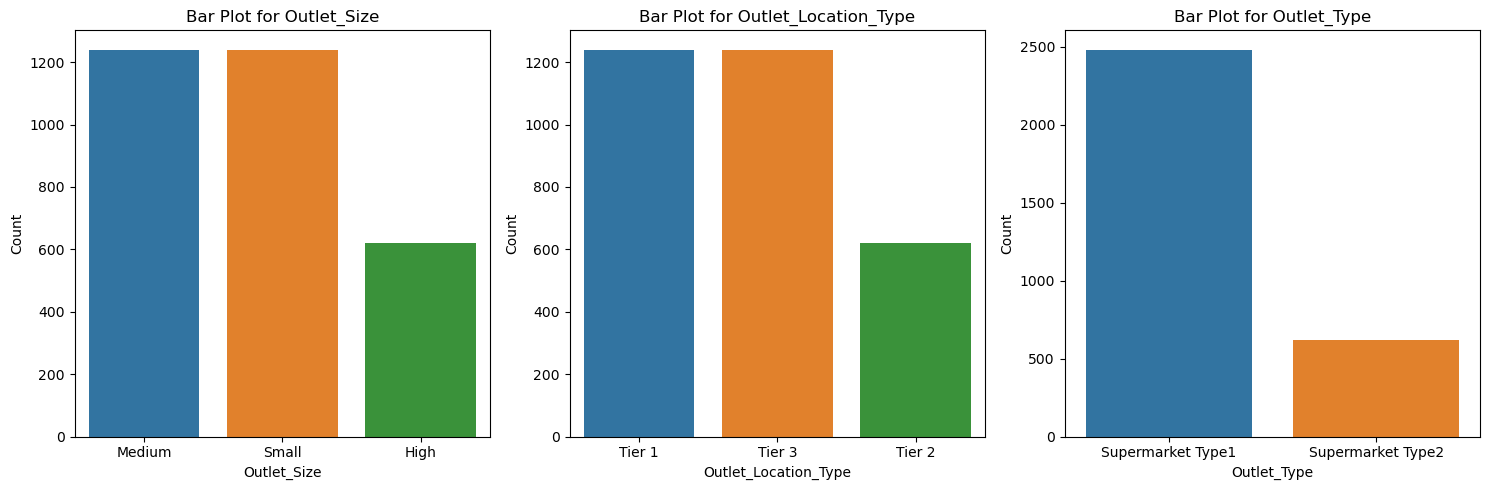

In [7]:
# Enter your code here

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical attributes to plot
categorical_attributes = ['Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

# Plot bar plots for each categorical attribute
plt.figure(figsize=(15, 5))

for i, attribute in enumerate(categorical_attributes, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=test_set_cleaned, x=attribute)
    plt.title(f'Bar Plot for {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


### Task 8

Investigate for potential correlations using a correlation plot / heatmap. Discuss your findings.

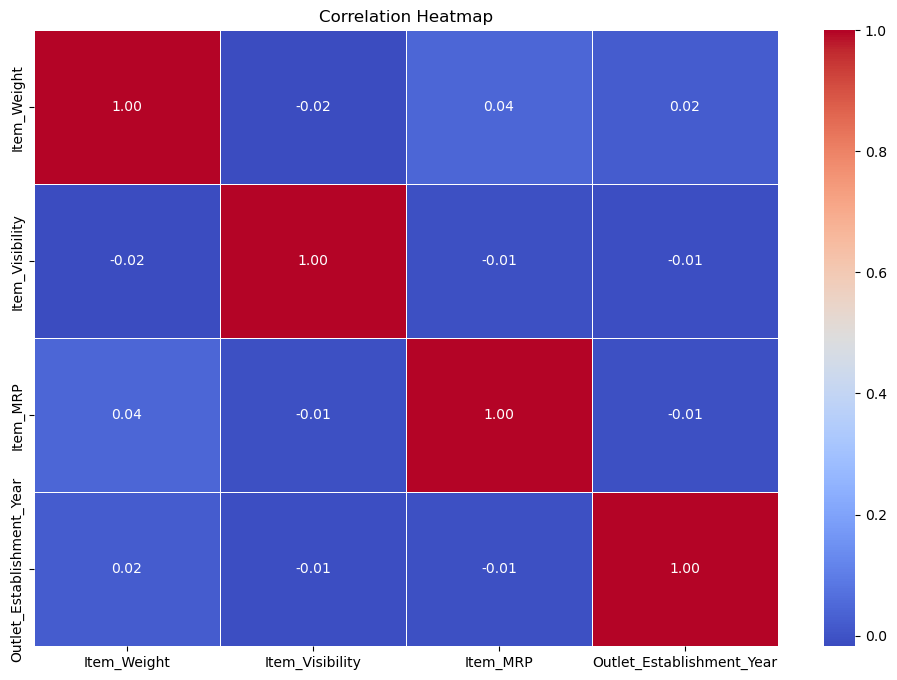

In [15]:
# Enter your code here

# Calculate correlation matrix
correlation_matrix = test_set_cleaned.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()


### Discussion

From the heatmap, we can observe that most of them has weak correlation based on the values. Anyways, the strongest positive correlation is between Item_MRP and Item_Weight since the value is closest to 1. After that, the strongest negative corraltion is between Item_Weight and Item_Visibility since the value is closest to -1. In average, there is no "strong correlation" observed.


### Task 9

Create a scatter plot using the cleaned Test set. You are free to use any numerical attributes and categorical attributes. Explore for potential patterns and groupings and discuss your findings

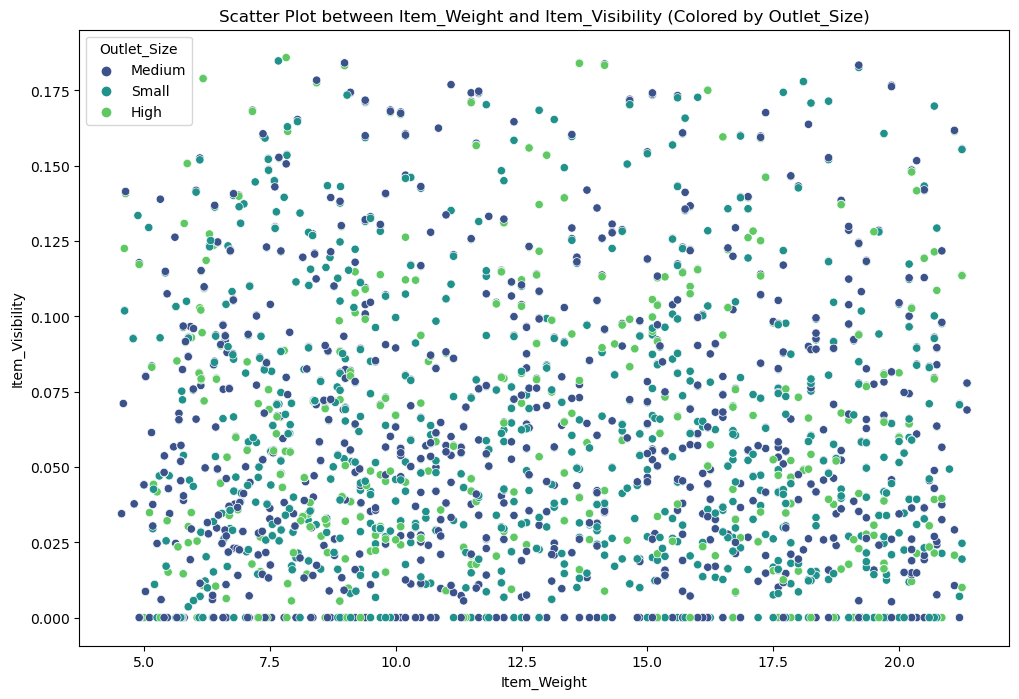

In [17]:
# Enter your code here

# Choose two numerical attributes and a categorical attribute for color differentiation
numerical_attr1 = 'Item_Weight'
numerical_attr2 = 'Item_Visibility'
categorical_attr = 'Outlet_Size'

# Create a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x=numerical_attr1, y=numerical_attr2, hue=categorical_attr, data=test_set_cleaned, palette='viridis')
plt.title(f"Scatter Plot between {numerical_attr1} and {numerical_attr2} (Colored by {categorical_attr})")
plt.xlabel(numerical_attr1)
plt.ylabel(numerical_attr2)
plt.show()


### Discussion

The well-scattered points across the three categories (represented by different colors) suggest that the chosen numerical attributes, Item_Weight and Item_Visibility, do not exhibit a clear grouping pattern based on Outlet_Size.

This could indicate that there is no strong linear relationship between these numerical attributes and the categorical variable Outlet_Size.